# A deep learning model to classify 10 letters from the Hindi Language

</br>
Diwankar R. Gupta

***

This notebook contains code for the following processes:
 - Collecting a dataset containing images of 10 letters from the hindi language
 - Preprocessing the data
 - Training a neural network to classify them accurately
 - Validating the model performance

 ***



### Dataset Info:

<h3><u>Devanagari Handwritten Character Dataset</u><h3>

This is an image database of Handwritten Devanagari characters. There are 46 classes of characters with 2000 examples each. The dataset is split into training set(85%) and testing set(15%).

***

In [50]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import shutil

In [7]:
# Downloading and extracting the dataset
!wget -O "handwritten_dataset.zip" "https://archive.ics.uci.edu/static/public/389/devanagari+handwritten+character+dataset.zip"
!unzip -qq "handwritten_dataset.zip"

--2024-01-03 09:05:14--  https://archive.ics.uci.edu/static/public/389/devanagari+handwritten+character+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘handwritten_dataset.zip’

handwritten_dataset     [        <=>         ]  76.69M  47.3MB/s    in 1.6s    

2024-01-03 09:05:16 (47.3 MB/s) - ‘handwritten_dataset.zip’ saved [80417803]



***

The dataset contains about 46 classes of characters, meaning there are images of 46 different letters. Keeping in mind the resource constraint, we will only train a model on a subset of the data, i.e. on 10 characters.

We will select images of only 10 different letters from the dataset.

***

### Preparing a subset of the dataset

In [15]:
# Lets look at the number of characters we have
import os

train_folders = os.listdir('DevanagariHandwrittenCharacterDataset/Train')

for i in train_folders:
  print(i)

character_3_ga
character_8_ja
character_29_waw
character_1_ka
character_12_thaa
character_34_chhya
digit_3
character_23_ba
digit_1
character_15_adna
digit_8
character_22_pha
digit_4
character_17_tha
character_21_pa
character_2_kha
character_10_yna
character_13_daa
character_4_gha
character_5_kna
character_32_patalosaw
character_30_motosaw
character_11_taamatar
character_28_la
character_14_dhaa
digit_2
character_31_petchiryakha
character_27_ra
character_19_dha
character_20_na
digit_7
character_7_chha
character_18_da
character_26_yaw
character_25_ma
digit_6
character_24_bha
digit_5
digit_9
character_33_ha
character_16_tabala
character_6_cha
character_35_tra
character_36_gya
character_9_jha
digit_0


Let's select the first 10 characters from the Hindi Language

<img width="600px" src="https://i.postimg.cc/MTPy82xf/Screenshot-2024-01-03-145402.png">


In [51]:
# Extracting folder names of first 10 characters

def filter_folders(start, end):
    directory_path = '/content/DevanagariHandwrittenCharacterDataset/Test'

    all_folders = [folder for folder in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, folder))]

    selected_folders = [folder for folder in all_folders if folder.startswith('character_') and start <= int(folder.split('_')[1]) <= end]

    return selected_folders

ten_folders = filter_folders(1, 10)

print(f"Selected Folders: \n{'='*50}")
for i in ten_folders:
  print(i)

Selected Folders: 
character_3_ga
character_8_ja
character_1_ka
character_2_kha
character_10_yna
character_4_gha
character_5_kna
character_7_chha
character_6_cha
character_9_jha


Let's create a different directory to store our subset data. This will preserve our original dataset if we need it again.

In [42]:
# Set up the directories for train and test data
train_path = "/content/DevanagariHandwrittenCharacterDataset/Train"
test_path = "/content/DevanagariHandwrittenCharacterDataset/Test"

In [56]:
def create_copy_of_dataset(source_path, destination_path, subset):

  # Iterate over each folder in the result and copy it to the destination directory
  for folder in subset:
      try:
          shutil.copytree(os.path.join(source_path, folder), os.path.join(destination_path, folder))
          print(f"Folder '{folder}' copied successfully.")
      except FileExistsError:
          print(f"Folder '{folder}' already exists in the destination directory.")

  print("All specified folders have been copied.\n")

# Create train copy
create_copy_of_dataset(train_path, "/content/HandwrittenSubset/Train", ten_folders)

# Create test copy
create_copy_of_dataset(test_path, "/content/HandwrittenSubset/Test", ten_folders)

Folder 'character_3_ga' copied successfully.
Folder 'character_8_ja' copied successfully.
Folder 'character_1_ka' copied successfully.
Folder 'character_2_kha' copied successfully.
Folder 'character_10_yna' copied successfully.
Folder 'character_4_gha' copied successfully.
Folder 'character_5_kna' copied successfully.
Folder 'character_7_chha' copied successfully.
Folder 'character_6_cha' copied successfully.
Folder 'character_9_jha' copied successfully.
All specified folders have been copied.

Folder 'character_3_ga' copied successfully.
Folder 'character_8_ja' copied successfully.
Folder 'character_1_ka' copied successfully.
Folder 'character_2_kha' copied successfully.
Folder 'character_10_yna' copied successfully.
Folder 'character_4_gha' copied successfully.
Folder 'character_5_kna' copied successfully.
Folder 'character_7_chha' copied successfully.
Folder 'character_6_cha' copied successfully.
Folder 'character_9_jha' copied successfully.
All specified folders have been copied.



In [71]:
# Number of images in our dataset
def count_files_in_folder(folder_path):
    try:

        files = os.listdir(folder_path)

        # Filter out directories (if any)
        files = [file for file in files if os.path.isfile(os.path.join(folder_path, file))]

        return len(files)

    except FileNotFoundError:
        print(f"Folder '{folder_path}' not found.")
    except PermissionError:
        print(f"Permission error accessing folder '{folder_path}'.")


folder_path = '/content/HandwrittenSubset/'

for _ in ten_folders:
  train_subdir_path = folder_path + 'Train/' + _
  test_subdir_path = folder_path + 'Test/' + _
  print(f"Train Count for {_}: {count_files_in_folder(train_subdir_path)}")
  print(f"Test Count for {_}: {count_files_in_folder(test_subdir_path)}")
  print('=' * 50)

Train Count for character_3_ga: 1700
Test Count for character_3_ga: 300
Train Count for character_8_ja: 1700
Test Count for character_8_ja: 300
Train Count for character_1_ka: 1700
Test Count for character_1_ka: 300
Train Count for character_2_kha: 1700
Test Count for character_2_kha: 300
Train Count for character_10_yna: 1700
Test Count for character_10_yna: 300
Train Count for character_4_gha: 1700
Test Count for character_4_gha: 300
Train Count for character_5_kna: 1700
Test Count for character_5_kna: 300
Train Count for character_7_chha: 1700
Test Count for character_7_chha: 300
Train Count for character_6_cha: 1700
Test Count for character_6_cha: 300
Train Count for character_9_jha: 1700
Test Count for character_9_jha: 300


In [40]:
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import accuracy_score,classification_report

In [72]:
# Set up the new directories path for train and test data
new_train_path = "/content/HandwrittenSubset/Train"
new_test_path = "/content/HandwrittenSubset/Test"

In [112]:
#Import the data from the directories, then transform them into batches
training_dataset = image_dataset_from_directory(directory = new_train_path,
                                                image_size = (32,32),
                                                batch_size = 32,
                                                label_mode = 'categorical')

testing_dataset = image_dataset_from_directory(directory = new_test_path,
                                                image_size = (32,32),
                                                batch_size = 32,
                                                label_mode = 'categorical',
                                                shuffle = False)

Found 17000 files belonging to 10 classes.
Found 3000 files belonging to 10 classes.


In [113]:
print(training_dataset)
print(testing_dataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>


In [114]:
training_dataset.class_names

['character_10_yna',
 'character_1_ka',
 'character_2_kha',
 'character_3_ga',
 'character_4_gha',
 'character_5_kna',
 'character_6_cha',
 'character_7_chha',
 'character_8_ja',
 'character_9_jha']

In [115]:
# Hindi Letters
hindi_character = 'क ख ग घ ङ च छ ज झ ञ'.split(" ")

# Class names (Typed)
class_names = '''character_1_ka character_2_kha character_3_ga character_4_gha character_5_kna character_6_cha character_7_chha
character_8_ja character_9_jha character_10_yna'''

# Extracting class names from dataset
class_names_from_dataset = training_dataset.class_names

# Sort the hindi character names according to training dataset
hindi_character_list = []

for char in class_names_from_dataset:
  position = int(char.split("_")[1])
  hindi_character_list.append(hindi_character[position - 1])

hindi_character_list

['ञ', 'क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ']

In [ ]:
# Download Hindi Fonts to display is matplotlib plots
def get_hindi_fonts():

  if not os.path.exists("Nirmala.ttf"):
    print("Downloading Hindi fonts...")
    print("Downloading the Nirmala.tff ...")
    !wget "https://www.wfonts.com/download/data/2016/04/29/nirmala-ui/nirmala-ui.zip"
    !unzip -q nirmala-ui.zip

  else:
    print("Nirmala.ttf already exist. Skipping downloading...")

get_hindi_fonts()

--2024-01-03 11:58:22--  https://www.wfonts.com/download/data/2016/04/29/nirmala-ui/nirmala-ui.zip
Resolving www.wfonts.com (www.wfonts.com)... 104.21.1.127, 172.67.129.58, 2606:4700:3037::6815:17f, ...
Connecting to www.wfonts.com (www.wfonts.com)|104.21.1.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 686493 (670K) [application/octetstream]
Saving to: ‘nirmala-ui.zip’

nirmala-ui.zip      100%[===================>] 670.40K  3.08MB/s    in 0.2s    

2024-01-03 11:58:23 (3.08 MB/s) - ‘nirmala-ui.zip’ saved [686493/686493]



In [116]:
# This function will take one batch and display all of the images and labels that are associated with that batch.
def display_images_from_dataset(dataset , subplots = (8,4) , figsize = (12,20)):

    '''
    dataset : From where the images to be displayed
    subplot : No of plot to be displayed (Default : subplot = (8,4) )
    figsize : Size of figure (Default : (12,20) )
    '''

    plt.figure(figsize = figsize)
    for images , labels in dataset.take(1):
      for i in range(subplots[0] * subplots[1]):
        plt.subplot(subplots[0], subplots[1], i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis(False)

    plt.show()

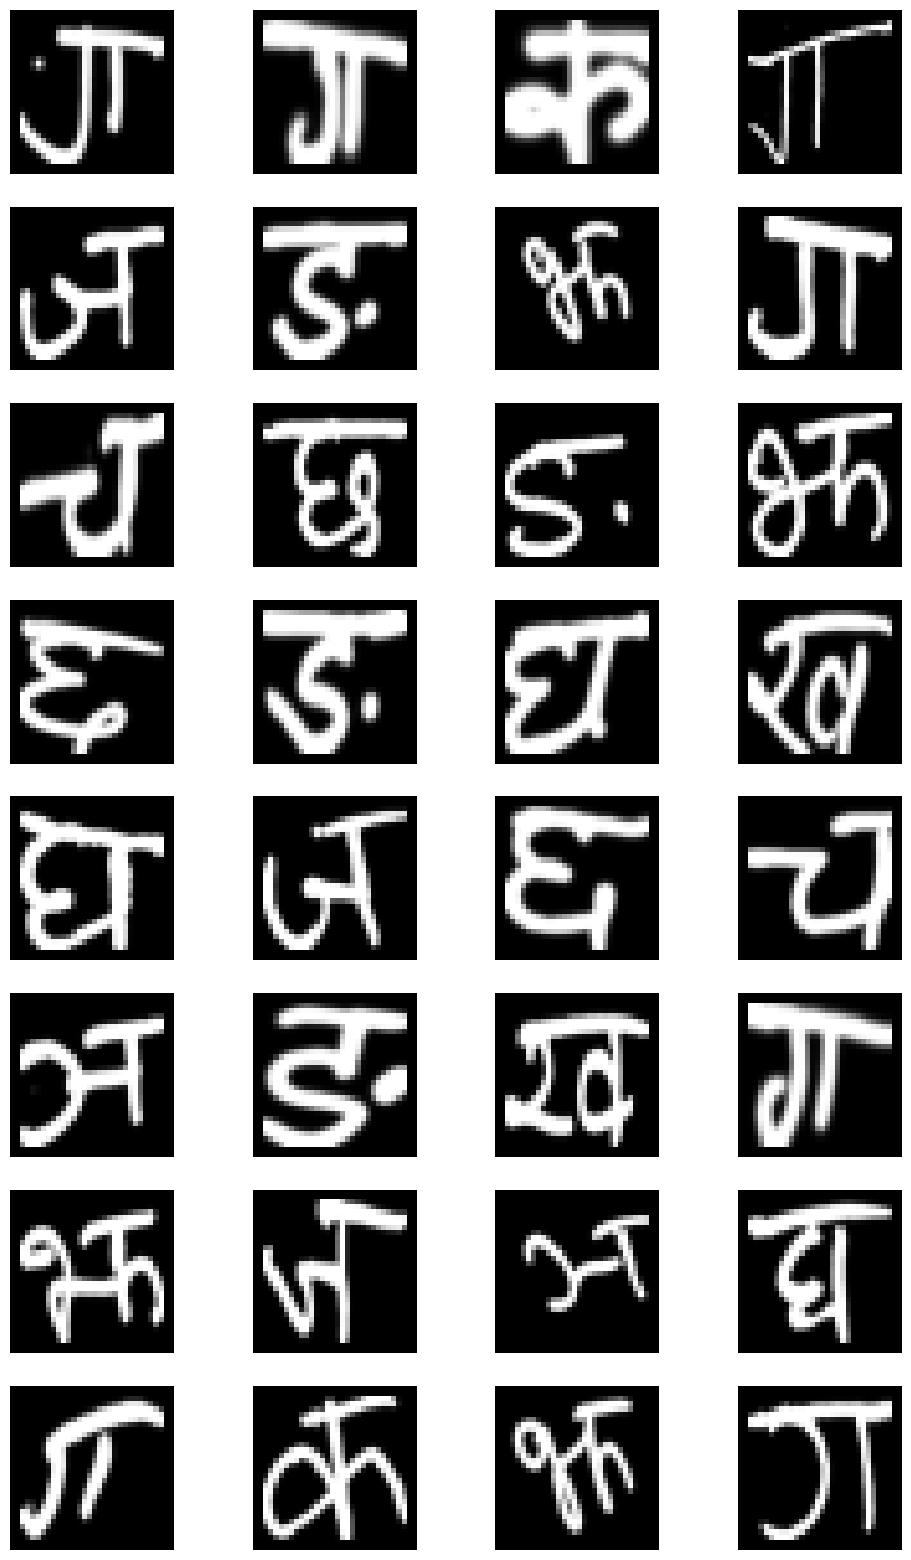

In [117]:
display_images_from_dataset(training_dataset)

In [137]:
# Get the size of the training data

training_size = len(training_dataset)

# 85 - 15 split for training and validation respectively
training_data = training_dataset.take(int((1  -0.15) * training_size))
validation_data = training_dataset.skip(int((1 - 0.15) * training_size))

In [138]:
from tensorflow.keras import layers

# Convolutional layers
model_1 = tf.keras.Sequential()
model_1.add(layers.Rescaling(1./255))

# Layer 1
model_1.add(layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))
model_1.add(layers.AveragePooling2D())

# Layer 2
model_1.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model_1.add(layers.AveragePooling2D())

# Flatten layer
model_1.add(layers.Flatten())

# Fully Connected layers
model_1.add(layers.Dense(120, activation='relu'))
model_1.add(layers.Dense(84, activation='relu'))
model_1.add(layers.Dense(len(class_names_from_dataset), activation='softmax'))

# Build the model
model_1.build(input_shape = (None, 32, 32, 3))

In [139]:
# Compile Model
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [140]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_8 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_9 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_4 (Flatten)         (None, 400)              

In [141]:
# Defining model checkpoints, early stopping, and reduce_lr

checkpoint_path = "/content/Model_1/" + "LeNet_ModelCheckPoint_callback/" + "checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only = True,
                                                         save_best_only = True,
                                                         monitor = 'val_accuracy')

# EarlyStopping Callback
# Stop training when accuracy isn't increasing
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                  patience = 4)

# Reduce learning rate when validation accuracy does not improve
reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                 factor = 0.2,
                                                 min_lr = 1e-7,
                                                 patience=3)

In [142]:
# Model fitting on the loaded dataset
model_1_history = model_1.fit(training_data,
                        epochs = 12 ,
                        steps_per_epoch = len(training_data),
                        validation_data = validation_data,
                        validation_steps = len(validation_data),
                        callbacks=[checkpoint_callback, early_stopping, reduce_lr_callback])


Epoch 1/12
452/452 [==============================] - 16s 33ms/step - loss: 0.4994 - accuracy: 0.8372 - val_loss: 0.1931 - val_accuracy: 0.9483
Epoch 2/12
452/452 [==============================] - 16s 36ms/step - loss: 0.1167 - accuracy: 0.9623 - val_loss: 0.0890 - val_accuracy: 0.9744
Epoch 3/12
452/452 [==============================] - 15s 33ms/step - loss: 0.0682 - accuracy: 0.9778 - val_loss: 0.0687 - val_accuracy: 0.9803
Epoch 4/12
452/452 [==============================] - 14s 32ms/step - loss: 0.0437 - accuracy: 0.9867 - val_loss: 0.0685 - val_accuracy: 0.9803
Epoch 5/12
452/452 [==============================] - 15s 32ms/step - loss: 0.0362 - accuracy: 0.9876 - val_loss: 0.1042 - val_accuracy: 0.9692
Epoch 6/12
452/452 [==============================] - 24s 53ms/step - loss: 0.0230 - accuracy: 0.9920 - val_loss: 0.0607 - val_accuracy: 0.9862
Epoch 7/12
452/452 [==============================] - 24s 52ms/step - loss: 0.0196 - accuracy: 0.9937 - val_loss: 0.0720 - val_accuracy:

In [144]:
model_1.evaluate(testing_dataset)

94/94 [==============================] - 1s 13ms/step - loss: 0.0510 - accuracy: 0.9860


[0.05103424936532974, 0.9860000014305115]

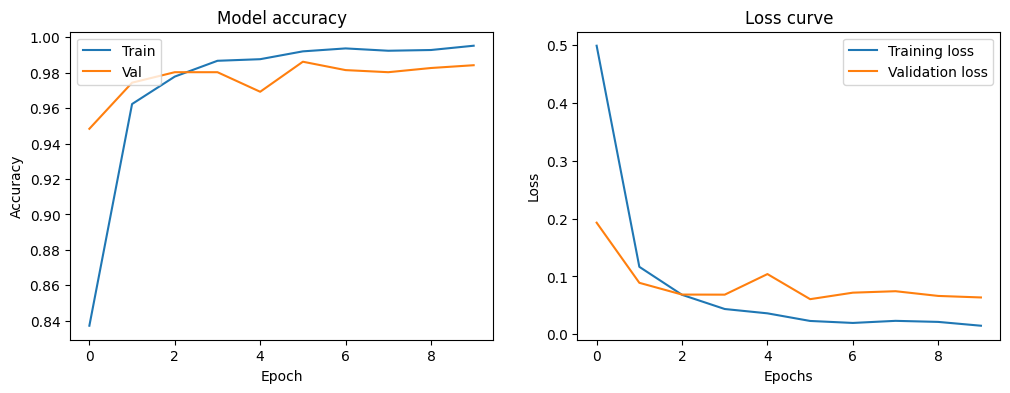

In [146]:
# Plot the training/validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.plot(model_1_history.history['accuracy'])
plt.plot(model_1_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot loss curve
plt.subplot(1, 2, 2)
plt.plot(model_1_history.history['loss'] , label = "Training loss")
plt.plot(model_1_history.history['val_loss'], label = "Validation loss")
plt.title("Loss curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='upper right')

In [148]:
predicted_probability = model_1.predict(testing_dataset , verbose=1)
predicted_class = predicted_probability.argmax(axis=1)

# Get the actual true label
y_true = []
for images, labels in testing_dataset.unbatch(): # unbatch the test data and get images and labels
  y_true.append(labels.numpy().argmax())

94/94 [==============================] - 2s 20ms/step


In [149]:
# Get the accuracy
accuracy_score(y_true,predicted_class)

0.986

In [152]:
# Evaluating the model
train_mse = model_1.evaluate(training_dataset, verbose = 1)
test_mse = model_1.evaluate(testing_dataset, verbose = 1)

print('Evaluating the Model')
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

94/94 [==============================] - 1s 12ms/step - loss: 0.0510 - accuracy: 0.9860
Evaluating the Model
Train MSE: [0.022512776777148247, 0.9934706091880798]
Test MSE: [0.05103424936532974, 0.9860000014305115]


In [163]:
# Get the image path for all of our test data.

test_set = image_dataset_from_directory(directory = new_test_path,
                                                image_size =(32,32),
                                                batch_size =32,
                                                label_mode = 'categorical',
                                                shuffle = False)

image_paths=[] # Store the image path

for img_path in test_set.list_files("/content/HandwrittenSubset/Test/*/*.png", shuffle = False):
  image_paths.append(img_path.numpy())

image_paths[:10] # Display first 10 image path


Found 3000 files belonging to 10 classes.


[b'/content/HandwrittenSubset/Test/character_10_yna/10544.png',
 b'/content/HandwrittenSubset/Test/character_10_yna/10551.png',
 b'/content/HandwrittenSubset/Test/character_10_yna/121.png',
 b'/content/HandwrittenSubset/Test/character_10_yna/125.png',
 b'/content/HandwrittenSubset/Test/character_10_yna/135.png',
 b'/content/HandwrittenSubset/Test/character_10_yna/13642.png',
 b'/content/HandwrittenSubset/Test/character_10_yna/13656.png',
 b'/content/HandwrittenSubset/Test/character_10_yna/13657.png',
 b'/content/HandwrittenSubset/Test/character_10_yna/13674.png',
 b'/content/HandwrittenSubset/Test/character_10_yna/13680.png']

In [164]:
predicted_probability = model_1.predict(testing_dataset , verbose=1)
predicted_class = predicted_probability.argmax(axis=1)

# Create a dataframe out of current prediction data for error analysis

df = pd.DataFrame(data={"image_paths":image_paths,
                        "y_true" : y_true,
                        "y_pred" : predicted_class,
                        "prediction_confidence":predicted_probability.max(axis=1),
                        "Actual_class":[hindi_character_list[i] for i in y_true],
                        "Predicted_class" : [hindi_character_list[i] for i in predicted_class]})
df.head()

94/94 [==============================] - 1s 12ms/step


,image_paths,y_true,y_pred,prediction_confidence,Actual_class,Predicted_class
0,b'/content/HandwrittenSubset/Test/character_10...,0,0,0.999830,ञ,ञ
1,b'/content/HandwrittenSubset/Test/character_10...,0,0,0.999990,ञ,ञ
2,b'/content/HandwrittenSubset/Test/character_10...,0,0,0.999400,ञ,ञ
3,b'/content/HandwrittenSubset/Test/character_10...,0,0,0.999049,ञ,ञ
4,b'/content/HandwrittenSubset/Test/character_10...,0,0,0.997791,ञ,ञ


In [165]:
# Get dataframe having wrong predictions and sort the dataframe in ascending order by predictions confidence
wrong_df = df[df['y_true'] != df['y_pred']].sort_values(by = 'prediction_confidence', ascending = False)
wrong_df.head()

,image_paths,y_true,y_pred,prediction_confidence,Actual_class,Predicted_class
2108,b'/content/HandwrittenSubset/Test/character_7_...,7,4,0.999934,छ,घ
2696,b'/content/HandwrittenSubset/Test/character_8_...,8,5,0.999906,ज,ङ
1638,b'/content/HandwrittenSubset/Test/character_5_...,5,7,0.997094,ङ,छ
93,b'/content/HandwrittenSubset/Test/character_10...,0,8,0.996267,ञ,ज
1201,b'/content/HandwrittenSubset/Test/character_4_...,4,7,0.993130,घ,छ


In [166]:
# Viewing the top 20 wrong predictions
def display_wrong_prediction(data , subplots = (5,4) , figsize = (10,10) , fontsize = 20):
  from pathlib import Path
  from matplotlib.font_manager import FontProperties

  hindi_font = FontProperties(fname=Path('/content/Nirmala.ttf'))

  plt.figure(figsize = figsize)
  k=1
  for row in data.itertuples():

    plt.subplot(subplots[0],subplots[1],k)
    k=k+1
    img = tf.io.read_file(row[1])
    img = tf.io.decode_image(img)

    plt.imshow(tf.squeeze(img).numpy().astype('uint8'), cmap = 'gray')
    plt.title(f"Actual Class : {row[5]}\nPredicted Class : {row[6]}\nConfidence : {row[4]*100:.2f}",
              fontproperties = hindi_font,
              fontsize = fontsize,color='red')
    plt.axis(False)

  plt.show()

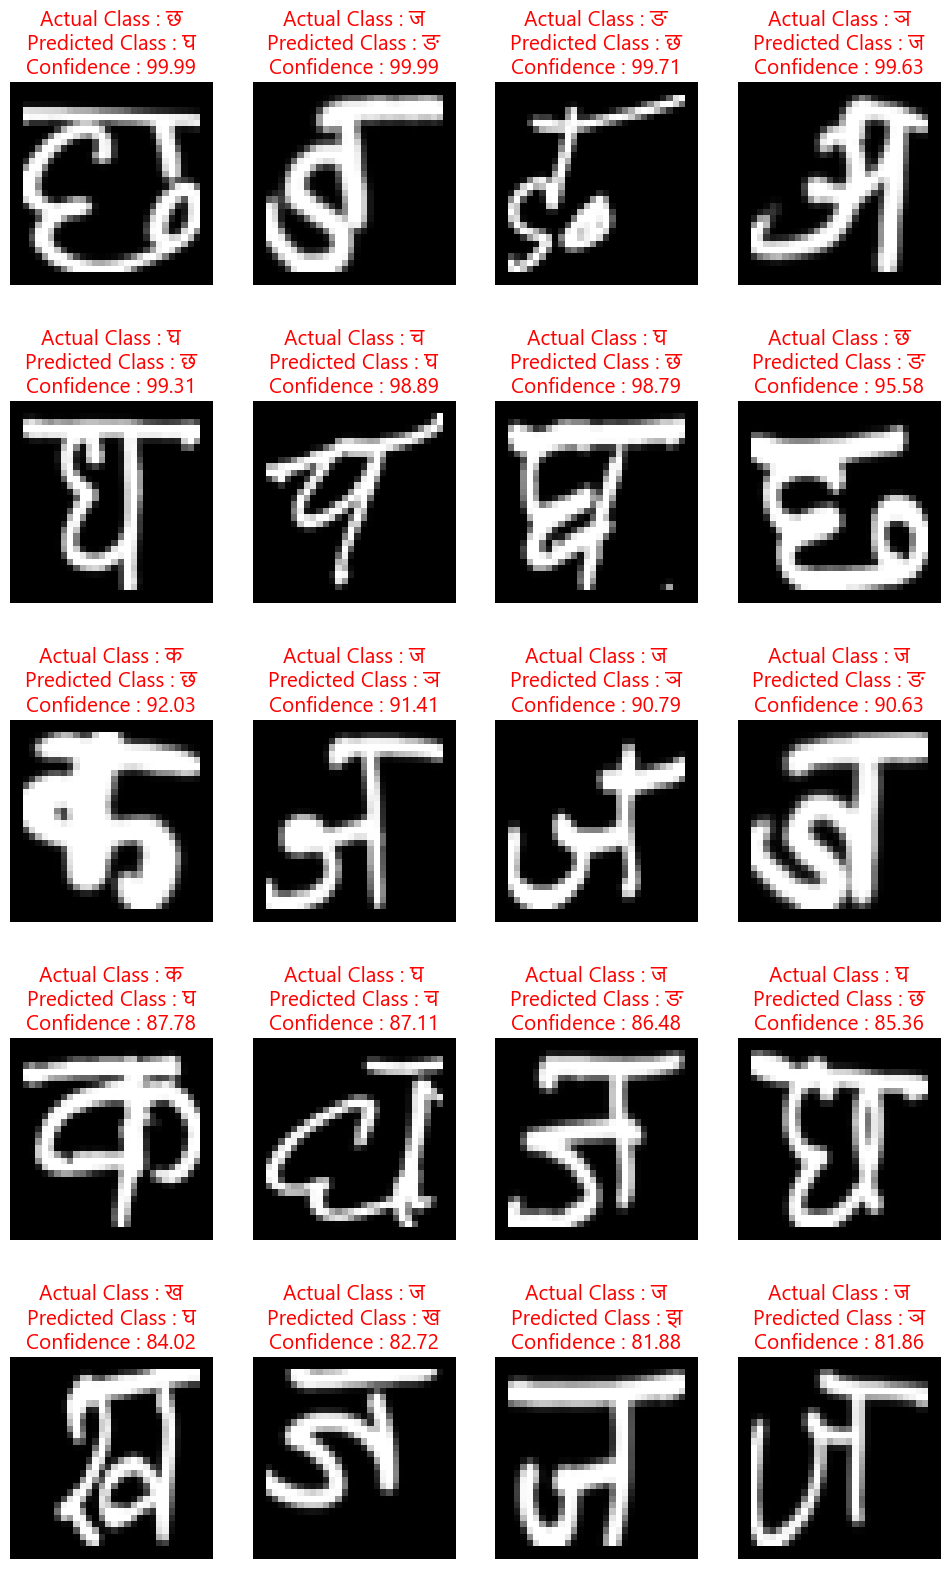

In [167]:
# Display top 20 wrongly predicted images
display_wrong_prediction(data = wrong_df[:20], figsize = (12, 20), fontsize = 15)

Model is confused with letters that have similar style. This can be further improved using hyperparameter tuning, more complex models and trying out other architectures. These can be included as a future scope.